In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import numpy.ma as ma
plt.rcParams.update({'font.size': 36})

In [3]:
dt = 1/140.69 # sampling interval (s)
filename = './data/info_flow_vtheta_mecp2_3_'
T = 1
lag = 1#maxt#1

tau = int(30/dt) # window
l = int(10/dt) # interval

gap = 1
maxtau = int(5/dt/gap)
maxt= int(maxtau/T)


In [4]:
t0 = 0
tf = -1

In [6]:
r1s, u11s, u21s, s1s = [], [], [], []
r2s, u22s, u12s, s2s = [], [], [], []
Itot_mu = []

for expid in range(10):
    try:
        a = np.load(filename + str(expid) + '.npy', allow_pickle=1)
    except:
        print('no data')
        continue
#     if a[0][1] == 0:
#         continue
    print(a[0][0])
    mi11, mi21, mi121 = a[1][0], a[1][2], a[1][5]
    mi121[np.where(mi121 < 10 ** -2)] = np.nan
    r1 = np.min([mi11, mi21], axis=0)
    u11, u21 = mi11 - r1, mi21 - r1
    s1 = mi121 - u11 - u21 - r1


    mi22, mi12, mi212 = a[1][3], a[1][1], a[1][4]
    mi212[np.where(mi212 < 10 ** -2)] = np.nan
    r2 = np.min([mi22, mi12], axis=0)
    u22, u12 = mi22 - r2, mi12 - r2
    s2 = mi212 - u22 - u12 - r2
    
    r1, u11, u21, s1 = r1 / mi121, u11 / mi121, u21 / mi121, s1 / mi121
    r2, u22, u12, s2 = r2 / mi212, u22 / mi212, u12 / mi212, s2 / mi212

    if np.nanmean(u11) > np.nanmean(u22):
        r1s.append(np.nanmean(r1[t0:tf]))
        u11s.append(np.nanmean(u11[t0:tf]))
        u21s.append(np.nanmean(u21[t0:tf]))
        s1s.append(np.nanmean(s1[t0:tf]))
        r2s.append(np.nanmean(r2[t0:tf]))
        u22s.append(np.nanmean(u22[t0:tf]))
        u12s.append(np.nanmean(u12[t0:tf]))
        s2s.append(np.nanmean(s2[t0:tf]))
    else:
        r1s.append(np.nanmean(r2[t0:tf]))
        u11s.append(np.nanmean(u22[t0:tf]))
        u21s.append(np.nanmean(u12[t0:tf]))
        s1s.append(np.nanmean(s2[t0:tf]))
        r2s.append(np.nanmean(r1[t0:tf]))
        u22s.append(np.nanmean(u11[t0:tf]))
        u12s.append(np.nanmean(u21[t0:tf]))
        s2s.append(np.nanmean(s1[t0:tf]))

    Itot_mu.append(mi121[t0:tf])
    Itot_mu.append(mi212[t0:tf])

Zebrafish20240424_1026-pc2
Zebrafish20240426_1029-pc2
Zebrafish20240510_1016-pc2
Zebrafish20240805_1454-pc2
Zebrafish20240806_1433-pc2
Zebrafish20240808_1455-pc2
no data
no data
no data
no data


In [8]:
yf = 0.13
width = 1

In [9]:
r1m_mu = np.nanmean(r1s)
u11m_mu = np.nanmean(u11s)
u21m_mu = np.nanmean(u21s)
s1m_mu = np.nanmean(s1s)
r1sd_mu = np.nanstd(r1s)/np.sqrt(len(r1s))
u11sd_mu = np.nanstd(u11s)/np.sqrt(len(u11s))
u21sd_mu = np.nanstd(u21s)/np.sqrt(len(u21s))
s1sd_mu = np.nanstd(s1s)/np.sqrt(len(s1s))

r2m_mu = np.nanmean(r2s)
u22m_mu = np.nanmean(u22s)
u12m_mu = np.nanmean(u12s)
s2m_mu = np.nanmean(s2s)
r2sd_mu = np.nanstd(r2s)/np.sqrt(len(r2s))
u22sd_mu = np.nanstd(u22s)/np.sqrt(len(u22s))
u12sd_mu = np.nanstd(u12s)/np.sqrt(len(u12s))
s2sd_mu = np.nanstd(s2s)/np.sqrt(len(s2s))



In [12]:
dt = 1/140.69 # sampling interval (s)

#----------------------------------------------
filename = './data/info_flow_vtheta_newWT_'+'3_'
T = 1
lag = 1#maxt#1

tau = int(30/dt) # window
l = int(10/dt) # interval

#tau = int(2*60/dt) # window
#l = int(30/dt) # interval

gap = 1
maxtau = int(5/dt/gap)
maxt= int(maxtau/T)
#----------------------------------------------

In [14]:
r1s, u11s, u21s, s1s = [], [], [], []
r2s, u22s, u12s, s2s = [], [], [], []
Itot = []

for expid in range(10):
    try:
        a = np.load(filename + str(expid) + '.npy', allow_pickle=1)
    except:
        print('no data')
        continue
#     if a[0][1] == 0:
#         continue
    print(a[0][0])
    mi11, mi21, mi121 = a[1][0], a[1][2], a[1][5]
    mi121[np.where(mi121 < 10 ** -2)] = np.nan
    r1 = np.min([mi11, mi21], axis=0)
    u11, u21 = mi11 - r1, mi21 - r1
    s1 = mi121 - u11 - u21 - r1


    mi22, mi12, mi212 = a[1][3], a[1][1], a[1][4]
    mi212[np.where(mi212 < 10 ** -2)] = np.nan
    r2 = np.min([mi22, mi12], axis=0)
    u22, u12 = mi22 - r2, mi12 - r2
    s2 = mi212 - u22 - u12 - r2
    
    r1, u11, u21, s1 = r1 / mi121, u11 / mi121, u21 / mi121, s1 / mi121
    r2, u22, u12, s2 = r2 / mi212, u22 / mi212, u12 / mi212, s2 / mi212

    if np.nanmean(u11) > np.nanmean(u22):
        r1s.append(np.nanmean(r1[t0:tf]))
        u11s.append(np.nanmean(u11[t0:tf]))
        u21s.append(np.nanmean(u21[t0:tf]))
        s1s.append(np.nanmean(s1[t0:tf]))
        r2s.append(np.nanmean(r2[t0:tf]))
        u22s.append(np.nanmean(u22[t0:tf]))
        u12s.append(np.nanmean(u12[t0:tf]))
        s2s.append(np.nanmean(s2[t0:tf]))
    else:
        r1s.append(np.nanmean(r2[t0:tf]))
        u11s.append(np.nanmean(u22[t0:tf]))
        u21s.append(np.nanmean(u12[t0:tf]))
        s1s.append(np.nanmean(s2[t0:tf]))
        r2s.append(np.nanmean(r1[t0:tf]))
        u22s.append(np.nanmean(u11[t0:tf]))
        u12s.append(np.nanmean(u21[t0:tf]))
        s2s.append(np.nanmean(s1[t0:tf]))
        
    Itot.append(mi121[t0:tf])
    Itot.append(mi212[t0:tf])


Zebrafish20240802_0920-pc2
Zebrafish20240805_0924-pc2
Zebrafish20240806_0903-pc2
Zebrafish20240807_0953-pc2
Zebrafish20240813_1104-pc2
Zebrafish20240814_0949-pc2
Zebrafish20240815_1029-pc2
Zebrafish20240816_0941-pc2
no data
no data


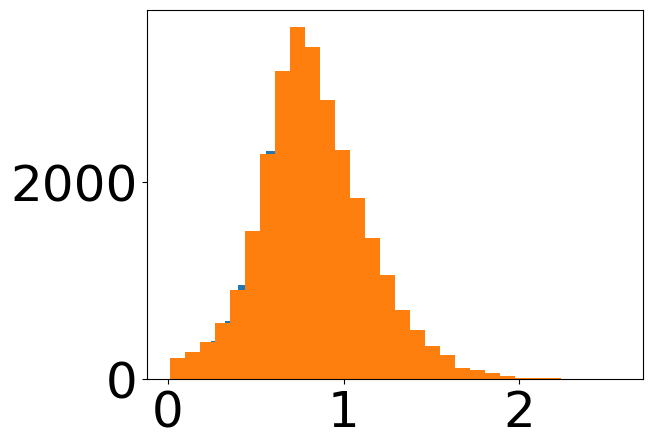

In [16]:
MUT = plt.hist(np.array(Itot_mu).reshape(-1),bins=30)
WT = plt.hist(np.array(Itot).reshape(-1),bins=30)
plt.show()


In [17]:
yf = 0.12
yf = 0.55
width = .5
gap = 2

In [18]:
r1m = np.nanmean(r1s)
u11m = np.nanmean(u11s)
u21m = np.nanmean(u21s)
s1m = np.nanmean(s1s)
r1sd = np.nanstd(r1s)/np.sqrt(len(r1s))
u11sd = np.nanstd(u11s)/np.sqrt(len(u11s))
u21sd = np.nanstd(u21s)/np.sqrt(len(u21s))
s1sd = np.nanstd(s1s)/np.sqrt(len(s1s))

r2m = np.nanmean(r2s)
u22m = np.nanmean(u22s)
u12m = np.nanmean(u12s)
s2m = np.nanmean(s2s)
r2sd = np.nanstd(r2s)/np.sqrt(len(r2s))
u22sd = np.nanstd(u22s)/np.sqrt(len(u22s))
u12sd = np.nanstd(u12s)/np.sqrt(len(u12s))
s2sd = np.nanstd(s2s)/np.sqrt(len(s2s))

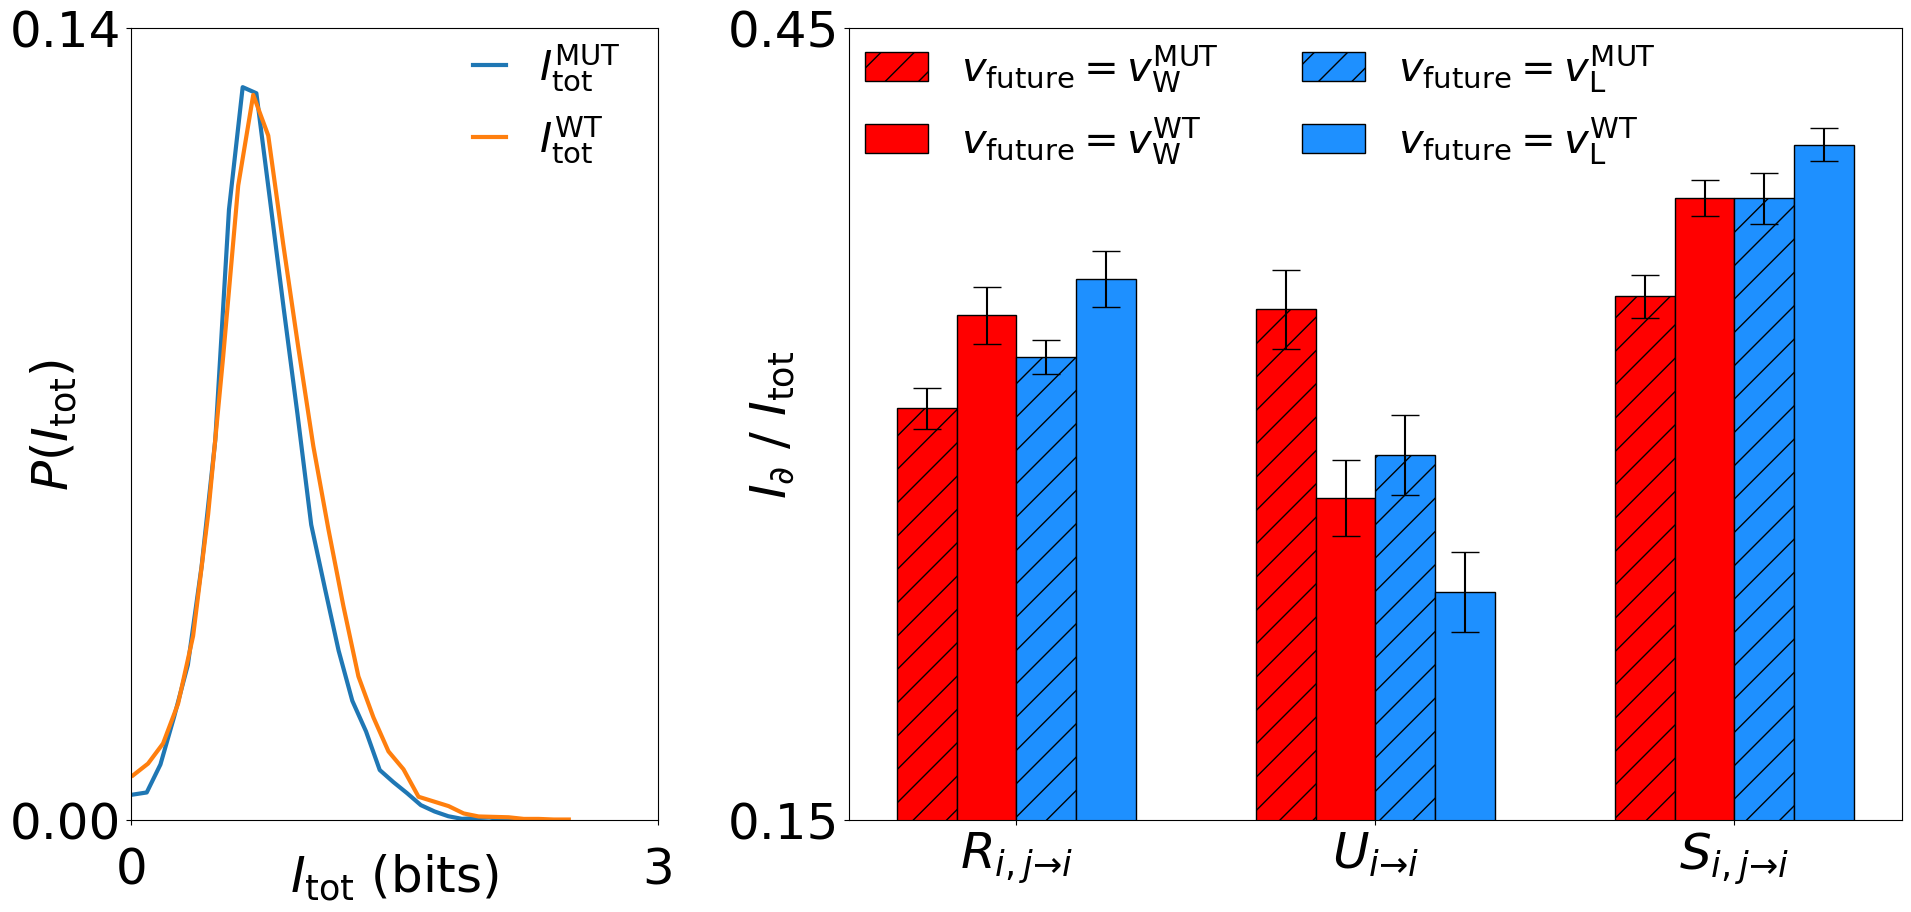

In [20]:
import matplotlib.gridspec as gridspec

# Create a figure with GridSpec (1 row, 2 columns) and set width ratios
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
axes = [ax1,ax2]

axes[0].plot(MUT[1][:-1],MUT[0]/np.sum(MUT[0]),label='$I_\mathrm{tot}^\mathrm{MUT}$',lw=3)
axes[0].plot(WT[1][:-1],WT[0]/np.sum(WT[0]),label='$I_\mathrm{tot}^\mathrm{WT}$',lw=3)
axes[0].legend(handlelength=.8,framealpha=0., fontsize=30, bbox_to_anchor=(1, 1.03))
axes[0].set_xlabel('$I_\mathrm{tot}$ (bits)')
axes[0].set_ylabel('$P(I_\mathrm{tot})$', labelpad=-50)
# axes[0].set_yticks([0.02,0.06])
ylim = [0,0.14]
axes[0].set_ylim([0,1.1*np.max([np.max(MUT[0]/np.sum(MUT[0])),np.max(WT[0]/np.sum(WT[0]))])])
axes[0].set_ylim(ylim)
axes[0].set_yticks(ylim)
xlim = [0,3]
axes[0].set_xticks(xlim)
axes[0].set_xlim(xlim)
axes[0].xaxis.set_label_coords(0.5, -0.04)
xticks = axes[0].get_xticklabels()
for tick in xticks:
    tick.set_y(-0.02)

x = np.array([0,1*(2*width+gap),2*(2*width+gap)])
alpha = 1
axes[1].bar(x-width*3/2,[r1m_mu,u11m_mu,s1m_mu],yerr=[r1sd_mu/2,u11sd_mu/2,s1sd_mu/2],color='r',label='$(i,j)=(\mathrm{winner},\mathrm{loser})$',
        edgecolor='black',width=width,capsize=10, hatch='/',alpha=alpha)#,'-',c='r',label='$M_{12}$')
axes[1].bar(x-width/2,[r1m,u11m,s1m],yerr=[r1sd/2,u11sd/2,s1sd/2],color='r',label='$(i,j)=(\mathrm{winner},\mathrm{loser})$',
        edgecolor='black',width=width,capsize=10, hatch='',alpha=alpha)#,'-',c='r',label='$M_{12}$') 

axes[1].bar(x+width*1/2,[r2m_mu,u22m_mu,s2m_mu],yerr=[r2sd_mu/2,u22sd_mu/2,s2sd_mu/2],color='dodgerblue',label='$(i,j)=(\mathrm{winner},\mathrm{loser})$',
        edgecolor='black',width=width,capsize=10, hatch='/',alpha=alpha)#,'-',c='r',label='$M_{12}$')
axes[1].bar(x+width*3/2,[r2m,u22m,s2m],yerr=[r2sd/2,u22sd/2,s2sd/2],color='dodgerblue',label='$(i,j)=(\mathrm{winner},\mathrm{loser})$',
        edgecolor='black',width=width,capsize=10, hatch='',alpha=alpha)#,'-',c='r',label='$M_{12}$') 
xticks = x 
xticklabels = list(['$R_{i,j\\to i}$','$U_{i\\to i}$','$S_{i,j\\to i}$'])
axes[1].set_xticks(xticks,labels=xticklabels)
# plt.legend(fontsize=24,handlelength=.6,framealpha=0.)
axes[1].legend(['$v_\mathrm{future}=v_\mathrm{W}^\mathrm{MUT}$','$v_\mathrm{future}=v_\mathrm{W}^\mathrm{WT}$',
                '$v_\mathrm{future}=v_\mathrm{L}^\mathrm{MUT}$', '$v_\mathrm{future}=v_\mathrm{L}^\mathrm{WT}$'],
               handlelength=1.5,framealpha=0.,loc="upper left", bbox_to_anchor=(-0.02, 1.03), fontsize=30, ncol=2)
axes[1].set_ylim([0.15,.45])
axes[1].set_yticks([0.15,.45])
# plt.ylabel('$I_\partial$')
plt.ylabel('$I_\partial\ /\ I_\mathrm{tot}$', labelpad=-50)



# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
